In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

In [13]:
# !python -m pip install --upgrade numpy

In [14]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.set(palette='RdYlGn')

<Figure size 864x576 with 0 Axes>

In [15]:
df_train = pd.read_csv('D:/Study/Python/data-set/Titanic/train.csv')
df_test = pd.read_csv('D:/Study/Python/data-set/Titanic/test.csv')
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

In [16]:
def get_categorical_continuous_variable_names (df):
    col_cate=list()
    col_cont=list()

    for x, y in df.dtypes.to_dict().items():
        if str(y) in ['object', 'category']:
            col_cate.append(x.strip())
        else:
            col_cont.append(x.strip())
    return {'col_cont':sorted(col_cont), 'col_cate':sorted(col_cate)}

In [17]:
get_categorical_continuous_variable_names(df_train)

{'col_cont': ['Age',
  'Fare',
  'Parch',
  'PassengerId',
  'Pclass',
  'SibSp',
  'Survived'],
 'col_cate': ['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket']}

In [18]:
#df_train.drop(['PassengerId', 'Ticket'], inplace=True, axis='columns')

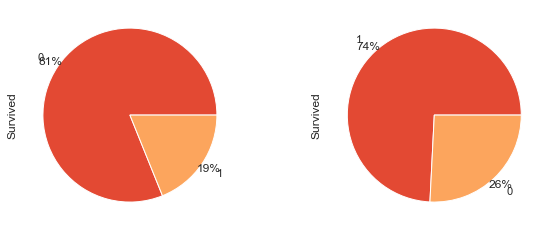

In [19]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
df_train[df_train['Sex'] == 'male']['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
fig.add_subplot(122)
df_train[df_train['Sex'] == 'female']['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

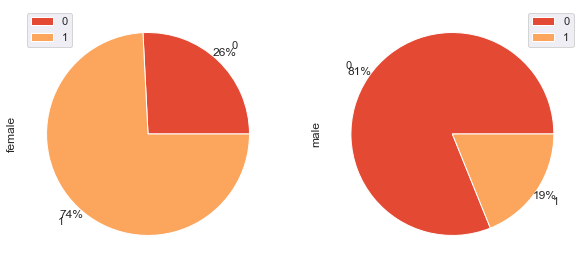

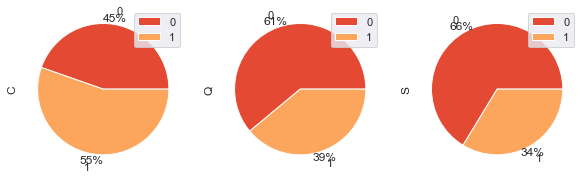

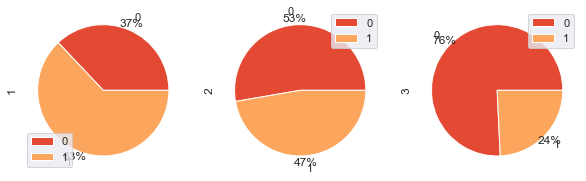

In [20]:
for col in ['Sex', 'Embarked', 'Pclass']:
    df_train.groupby(['Survived', col]).size().unstack().plot(kind='pie', figsize=(10,5), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, subplots=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(df_train['Sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [10]:
from sklearn.preprocessing import LabelEncoder
OrdinalEncoder().fit_transform(df_train[['Sex']])[:,0].astype(int)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [11]:
#df_train['Sex'] = df_train.apply(lambda x: 'child' if x['Age']<=16 else x['Sex'], axis=1)

In [24]:
for x, y in enumerate(df_train.groupby(['Sex']).size().sort_values(ascending=True).to_dict()):
    print(x, y)

0 1
1 2


In [25]:
dict_sex = {y:x for x, y in enumerate(df_train.groupby(['Sex']).size().sort_values(ascending=True).to_dict())}
dict_sex

{1: 0, 2: 1}

In [26]:
df_train['Sex'] = df_train['Sex'].map(dict_sex)
df_test['Sex'] = df_test['Sex'].map(dict_sex)

In [27]:
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [16]:
df_train['Name'] = df_train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['Name'] = df_test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = df_train['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
sex_pclass_age_dict = df_train.groupby(['Sex', 'Pclass'])['Age'].median().to_dict()
sex_pclass_age_dict

{(0, 1): 35.0,
 (0, 2): 28.0,
 (0, 3): 21.5,
 (1, 1): 40.0,
 (1, 2): 30.0,
 (1, 3): 25.0}

In [18]:
df_train['Age'] = df_train.apply(lambda x:sex_pclass_age_dict[(x['Sex'], x['Pclass'])] if pd.isna(x['Age']) else x['Age'], axis=1)
df_test['Age'] = df_test.apply(lambda x:sex_pclass_age_dict[(x['Sex'], x['Pclass'])] if pd.isna(x['Age']) else x['Age'], axis=1)


In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


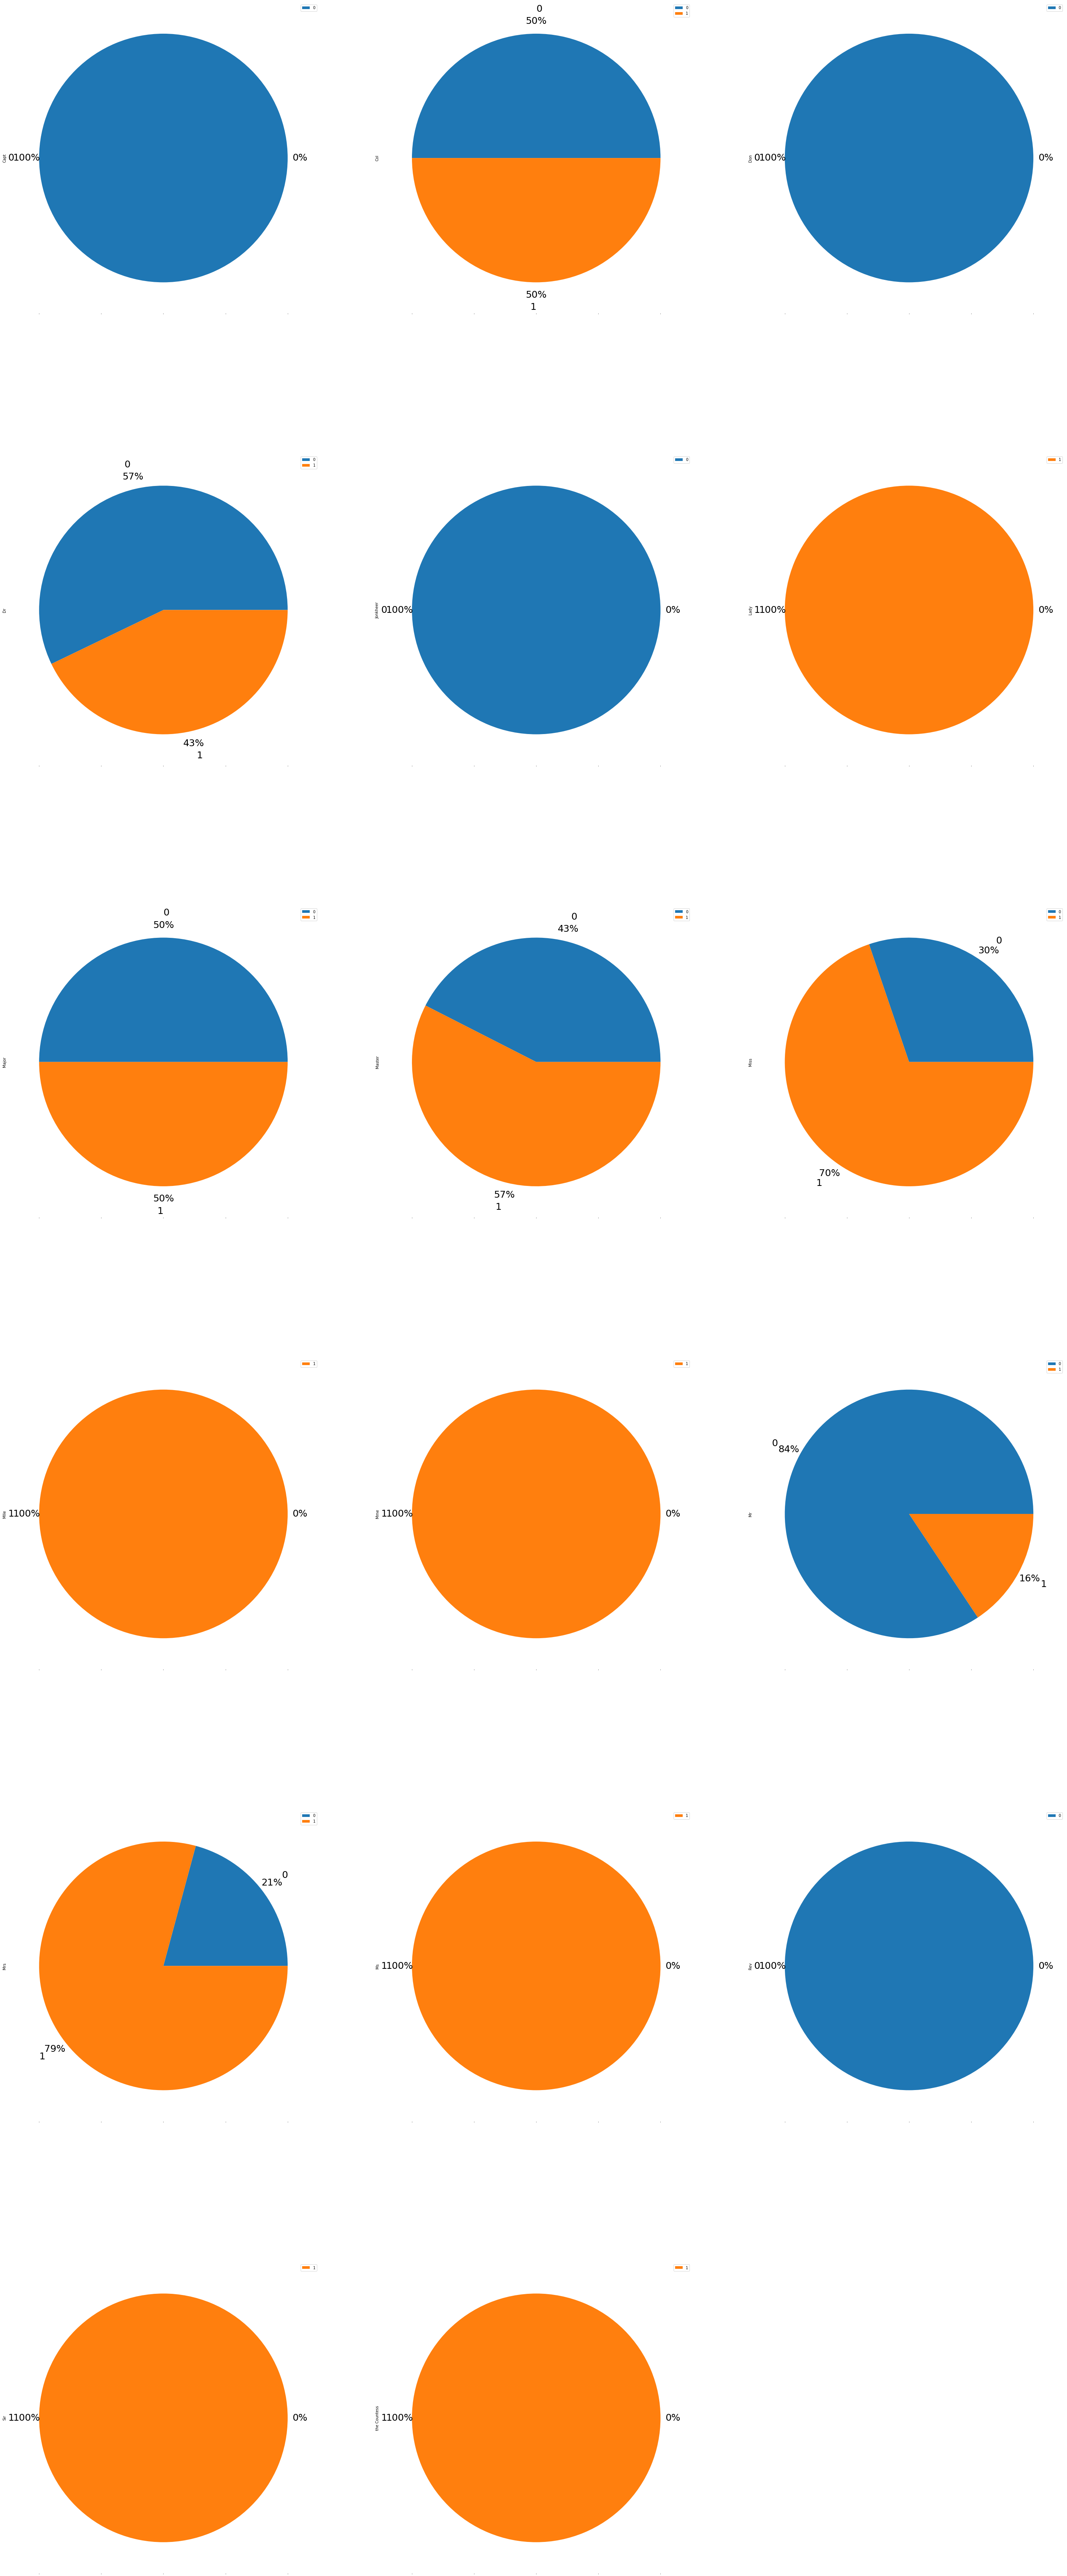

In [20]:
df_train.groupby(['Survived', 'Name']).size().unstack().fillna(0).plot(kind='pie', figsize=(50,150), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, subplots=True, layout=(7, 3), fontsize=25)
plt.show()

In [21]:
df_train['Name'] = df_train['Name'].apply(lambda x: 'Miss' if x in ['Ms', 'Mme', 'Mlle'] else x)
df_test['Name'] = df_test['Name'].apply(lambda x: 'Miss' if x in ['Ms', 'Mme', 'Mlle'] else x)

In [22]:
top_embarked = df_train['Embarked'].describe()['top']
df_train['Embarked'].fillna(top_embarked, inplace=True)
df_test['Embarked'].fillna(top_embarked, inplace=True)

In [23]:
df_train['Cabin'].fillna('U', inplace=True)
df_test['Cabin'].fillna('U', inplace=True)
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: x[0])
df_test['Cabin'] = df_test['Cabin'].apply(lambda x: x[0])

In [24]:
df_train[['SibSp', 'Parch']].fillna(0, inplace=True)
df_test[['SibSp', 'Parch']].fillna(0, inplace=True)
df_train['FamilySize'] = df_train.apply(lambda x: x['SibSp'] + x['Parch'], axis=1)
df_test['FamilySize'] = df_test.apply(lambda x: x['SibSp'] + x['Parch'], axis=1)

D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
def encode_df_column_per_frequency(df_train, df_test, col):
    name_count_dict_1 = df_train.groupby([col]).size().sort_values().to_dict()
    key_dict={}
    for x, y in name_count_dict_1.items():
        key_list = key_dict.get(y)
        if key_list is None:
            key_list = list()
            key_dict[y] = key_list
        key_list.append(x)
    name_count_dict = {y:x for x, y in enumerate(key_dict)}
    name_count_dict_2 = {}
    for x, y in list(enumerate(key_dict)):
        for k in key_dict[y]:
            name_count_dict_2[k] = x
    df_train[col] = df_train[col].apply(lambda x: name_count_dict_2[x])
    df_test[col] = df_test[col].apply(lambda x: name_count_dict_2.get(x))

In [26]:
def normalize_with_standard_scaler(df_train, df_test, col):
    std_scaler = StandardScaler()
    df_train[col] = std_scaler.fit_transform(df_train[col].values.reshape(-1, 1))
    df_test[col] = std_scaler.fit_transform(df_test[col].values.reshape(-1, 1))

In [27]:
for col in ['Sex', 'Name', 'Pclass', 'Embarked', 'Parch', 'SibSp', 'Cabin', 'FamilySize']:
    encode_df_column_per_frequency(df_train, df_test, col)

#for col in ['Sex', 'Name', 'Pclass', 'Embarked', 'Parch', 'SibSp', 'Cabin', 'FamilySize', 'Age', 'Fare']:
#    normalize_with_standard_scaler(df_train, df_test, col)

In [28]:
fare_dict = df_train.groupby(['Pclass'])['Fare'].median().to_dict()

df_train['Fare'] = df_train[['Fare', 'Pclass']].apply(lambda row: fare_dict[row['Pclass']] if pd.isna(row['Fare']) else row['Fare'], axis='columns')
df_test['Fare'] = df_test[['Fare', 'Pclass']].apply(lambda row: fare_dict.get(row['Pclass']) if pd.isna(row['Fare']) else row.get('Fare'), axis='columns')


In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,2,7,1,22.0,5,5,A/5 21171,7.2500,8,2,7
1,2,1,1,5,0,38.0,5,5,PC 17599,71.2833,7,1,7
2,3,1,2,6,0,26.0,6,5,STON/O2. 3101282,7.9250,8,2,8
3,4,1,1,5,0,35.0,5,5,113803,53.1000,7,2,7
4,5,0,2,7,1,35.0,6,5,373450,8.0500,8,2,8


In [30]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
FamilySize     False
dtype: bool

In [31]:
df_test.isna().any()

PassengerId    False
Pclass         False
Name            True
Sex            False
Age            False
SibSp          False
Parch           True
Ticket         False
Fare           False
Cabin          False
Embarked       False
FamilySize     False
dtype: bool

In [32]:
corr = df_train.corr()
corr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
PassengerId,1.000000,-0.005007,-0.018305,-0.018012,0.042939,0.039033,0.073612,0.002516,0.012658,-0.004039,0.030467,0.046474
Survived,-0.005007,1.000000,-0.247845,-0.357898,-0.543351,-0.059579,0.020940,-0.095059,0.257307,-0.251321,-0.106811,-0.030716
Pclass,-0.018305,-0.247845,1.000000,0.175054,0.118133,-0.238070,-0.072010,0.002559,-0.197168,0.199855,-0.168091,-0.056677
Name,-0.018012,-0.357898,0.175054,1.000000,0.429141,0.038476,0.252883,0.276897,-0.121998,0.127157,0.041027,0.307379
Sex,0.042939,-0.543351,0.118133,0.429141,1.000000,0.102706,0.135900,0.249053,-0.182333,0.095120,0.116569,0.222331
Age,0.039033,-0.059579,-0.238070,0.038476,0.102706,1.000000,0.260837,0.202604,0.122692,-0.191537,0.056434,0.267732
SibSp,0.073612,0.020940,-0.072010,0.252883,0.135900,0.260837,1.000000,0.450501,-0.175512,-0.050519,-0.069601,0.857600
Parch,0.002516,-0.095059,0.002559,0.276897,0.249053,0.202604,0.450501,1.000000,-0.233031,0.030636,-0.085037,0.816880
Fare,0.012658,0.257307,-0.197168,-0.121998,-0.182333,0.122692,-0.175512,-0.233031,1.000000,-0.237300,-0.062142,-0.213896
Cabin,-0.004039,-0.251321,0.199855,0.127157,0.095120,-0.191537,-0.050519,0.030636,-0.237300,1.000000,-0.020697,-0.021846


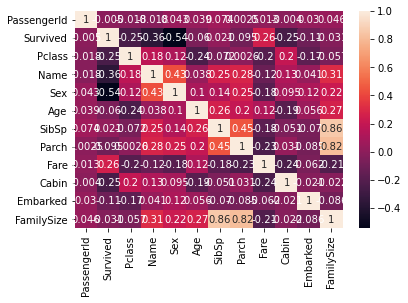

In [33]:
sns.heatmap(corr, annot=True)

In [34]:
#X = df_train[['Sex', 'FamilySize', 'Age', 'Pclass', 'Embarked', 'Name']]
X = df_train[['Sex', 'Age', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Fare']]
y = df_train['Survived']
pd.concat([X, y], axis=1)

,Sex,Age,Pclass,Embarked,SibSp,Parch,Fare,Survived
0,1,22.0,2,2,5,5,7.2500,0
1,0,38.0,1,1,5,5,71.2833,1
2,0,26.0,2,2,6,5,7.9250,1
3,0,35.0,1,2,5,5,53.1000,1
4,1,35.0,2,2,6,5,8.0500,0
...,...,...,...,...,...,...,...,...
886,1,27.0,0,2,6,5,13.0000,0
887,0,19.0,1,2,6,5,30.0000,1
888,0,21.5,2,2,5,3,23.4500,0
889,1,26.0,1,1,6,5,30.0000,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=201)

In [36]:
X_train

,Sex,Age,Pclass,Embarked,SibSp,Parch,Fare
703,1,25.00,2,0,6,5,7.7417
375,0,35.00,1,1,5,5,82.1708
201,1,25.00,2,2,1,3,69.5500
78,1,0.83,0,2,6,3,29.0000
615,0,24.00,0,2,5,3,65.0000
...,...,...,...,...,...,...,...
868,1,25.00,2,2,6,5,9.5000
353,1,25.00,2,2,5,5,17.8000
890,1,32.00,2,0,6,5,7.7500
553,1,22.00,2,1,6,5,7.2250


In [37]:
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100   9]
 [ 27  43]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       109
           1       0.83      0.61      0.70        70

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [39]:
test_data=df_test[X_test.columns]
test_data

,Sex,Age,Pclass,Embarked,SibSp,Parch,Fare
0,1,34.5,2,0,6,5.0,7.8292
1,0,47.0,2,2,5,5.0,7.0000
2,1,62.0,0,0,6,5.0,9.6875
3,1,27.0,2,2,6,5.0,8.6625
4,0,22.0,2,2,5,4.0,12.2875
...,...,...,...,...,...,...,...
413,1,25.0,2,2,6,5.0,8.0500
414,0,39.0,1,1,6,5.0,108.9000
415,1,38.5,2,2,6,5.0,7.2500
416,1,25.0,2,2,6,5.0,8.0500


In [40]:
test_data.isna().sum()

Sex         0
Age         0
Pclass      0
Embarked    0
SibSp       0
Parch       2
Fare        0
dtype: int64

In [41]:
test_data.fillna(0, inplace=True)

D:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
test_data.isna().sum()

Sex         0
Age         0
Pclass      0
Embarked    0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [43]:
result = clf.predict(test_data)

In [44]:
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [45]:
final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_1.csv", index=False)

In [47]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105   4]
 [ 20  50]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       109
           1       0.93      0.71      0.81        70

    accuracy                           0.87       179
   macro avg       0.88      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



In [49]:
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [50]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_2.csv", index=False)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### this takes almost 30 min to execute, hence commenting out
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### This too takes almost 20 minutes... so commenting out
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [100, 50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [53]:
log_regression_model = LogisticRegression(solver='lbfgs', C=10.0, random_state=201, max_iter=1000)

In [54]:
log_regression_model.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=1000, random_state=201)

In [55]:
y_pred = log_regression_model.predict(X_test)

In [56]:
log_regression_model.score(X_test, y_test)

0.8547486033519553

In [57]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[103   6]
 [ 20  50]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       109
           1       0.89      0.71      0.79        70

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [58]:
result = log_regression_model.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [59]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_3.csv", index=False)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=15)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [62]:
y_pred = KNN_classifier.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 19]
 [39 31]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       109
           1       0.62      0.44      0.52        70

    accuracy                           0.68       179
   macro avg       0.66      0.63      0.64       179
weighted avg       0.67      0.68      0.66       179



In [64]:
result = KNN_classifier.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [65]:
final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_4.csv", index=False)

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb_classifier_model = XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0.99,  learning_rate=0.01, n_estimators=10,
                                     random_state=201, max_depth=6, min_child_weight=1, nthread=4)
xgb_classifier_model.fit(X_train, y_train)

[18:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Programs\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.99, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=201, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [69]:
y_pred = xgb_classifier_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.80%


In [70]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102   7]
 [ 22  48]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       109
           1       0.87      0.69      0.77        70

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [71]:
result = xgb_classifier_model.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [72]:
final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_5.csv", index=False)

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
naive_bayes_model = GaussianNB()

In [76]:
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [77]:
y_pred = naive_bayes_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 85.47%
[[101   8]
 [ 18  52]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       109
           1       0.87      0.74      0.80        70

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [78]:
result = naive_bayes_model.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df





,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [79]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_6.csv", index=False)

In [81]:
from sklearn import svm

#### random forest
#### randomforest scaled fit
#### logistic regression
#### KNN
#### XGBoost
#### Naive bayes
#### SVC

In [82]:
svc_classifier = svm.SVC(C=50.0, kernel='rbf', gamma='scale')
svc_classifier.fit(X_train, y_train)

SVC(C=50.0)

In [83]:
y_pred = svc_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 75.98%
[[97 12]
 [31 39]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       109
           1       0.76      0.56      0.64        70

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179



In [84]:
result = svc_classifier.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df





,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [85]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_7.csv", index=False)

In [87]:
ridge_classifier = RidgeClassifier(alpha=0.1)
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 84.92%
[[103   6]
 [ 21  49]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       109
           1       0.89      0.70      0.78        70

    accuracy                           0.85       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.85      0.84       179



In [88]:
result = ridge_classifier.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [89]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_8.csv", index=False)

In [91]:
bagging_classifier = BaggingClassifier(n_estimators=10)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.77%
[[94 15]
 [23 47]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.76      0.67      0.71        70

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [95]:
df_train['Survived'].groupby(df_train['SibSp']).mean().to_dict()

{0: 0.0,
 1: 0.0,
 2: 0.25,
 3: 0.16666666666666666,
 4: 0.4642857142857143,
 5: 0.5358851674641149,
 6: 0.34539473684210525}

In [97]:
df_train[['Survived', 'SibSp']].groupby(['SibSp']).mean().to_dict()['Survived']

{0: 0.0,
 1: 0.0,
 2: 0.25,
 3: 0.16666666666666666,
 4: 0.4642857142857143,
 5: 0.5358851674641149,
 6: 0.34539473684210525}

In [101]:
df_train.groupby(['SibSp'])['Survived'].mean().to_dict()

{0: 0.0,
 1: 0.0,
 2: 0.25,
 3: 0.16666666666666666,
 4: 0.4642857142857143,
 5: 0.5358851674641149,
 6: 0.34539473684210525}

In [117]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64